# 1. Combinatorial Explosion
<div align="center">
<img src="attachment:9671839c-af9b-446d-a2c1-63b5cbda0794.png" alt="image2" width="400px" />
</div>

# 2. Mathematical Proof of Combinatorial Explosion

   ## 2.1 Number of Ways to Place $k$ Turbines in an $N \times N$ Grid

An $N \times N$ grid has $N^2$ distinct "cells" (or "boxes"). If we wish to place $k$ turbines, **each in a different cell**, we are essentially choosing $k$ distinct positions out of those $N^2$.

* The number of ways to choose $k$ distinct items from $N^2$ items is given by the **binomial coefficient**:

$$\binom{N^2}{k} \;=\; \frac{(N^2)!}{\,k!\,\bigl(N^2 - k\bigr)!}$$

Hence, the total count of distinct layouts (placements) is:

$$\boxed{\text{Number of layouts} \;=\; \binom{N^2}{k}}$$

   ## 2.2 Rapid (Factorial/Binomial) Growth

Recall that $n!$ (factorial) grows faster than any exponential $a^n$ for fixed $a$. The binomial coefficient $\binom{N^2}{k}$ involves factorials, and for large $N$ (even moderate sizes!), these factorials get huge. As a concrete example:

* For $N=4$, we have $16$ cells and we choose $k=10$:
  $$\binom{16}{10} \;=\; 8008$$

* For $N=5$, we have $25$ cells:
  $$\binom{25}{10} \;=\; 3{,}268{,}760$$

* For $N=10$, we have $100$ cells:
  $$\binom{100}{10} \;\approx\; 1.73 \times 10^{13}$$

This number escalates **super‐exponentially** in terms of $N$. Indeed, $\binom{N^2}{k}$ grows very fast because of the factorial terms involved.

## 3. Figuring out the number of combinations that could be possible
<div align="center">
<img src="attachment:3b04ea8d-75fe-47c5-aa69-6fb4de641ab5.png" alt="image1" width="300px" />
</div>

In [39]:
import math
import itertools
from typing import List, Tuple

def calculate_turbine_combinations(N: int, k: int) -> Tuple[int, List[List[int]]]:
    """
    Calculate the number of ways to place k turbines in an N x N grid and return sample combinations.
    
    Parameters:
    -----------
    N : int
        The size of one side of the square grid (N x N)
    k : int
        Number of turbines to place
    
    Returns:
    --------
    Tuple[int, List[List[int]]]
        Total number of combinations and a list of sample combinations (limited to first 5)
    
    Raises:
    -------
    ValueError
        If N < 1, k < 0, or k > N*N
    """
    # Input validation
    if N < 1:
        raise ValueError("Grid size N must be positive")
    if k < 0:
        raise ValueError("Number of turbines k must be non-negative")
    if k > N * N:
        raise ValueError(f"Cannot place {k} turbines in a {N}x{N} grid with {N*N} cells")
        
    # Calculate total number of combinations
    total_combinations = math.comb(N * N, k)
    
    # Generate a small sample of combinations for demonstration
    grid_positions = range(N * N)
    sample_combinations = []
    
    # Only generate combinations if the total is manageable
    if total_combinations <= 1000000:  # Arbitrary limit for memory safety
        iterator = itertools.combinations(grid_positions, k)
        for i, combo in enumerate(iterator):
            if i >= 5:  # Limit to 5 examples
                break
            # Convert positions to 2D coordinates for better visualization
            coords = [(pos // N, pos % N) for pos in combo]
            sample_combinations.append(coords)
    
    return total_combinations, sample_combinations

def format_combination_example(N: int, combo: List[Tuple[int, int]]) -> str:
    """
    Format a single combination as a visual grid representation.
    
    Parameters:
    -----------
    N : int
        Grid size
    combo : List[Tuple[int, int]]
        List of (row, col) coordinates where turbines are placed
    
    Returns:
    --------
    str
        String representation of the grid with turbines marked as 'T'
    """
    grid = [['.' for _ in range(N)] for _ in range(N)]
    for row, col in combo:
        grid[row][col] = 'T'
    return '\n'.join(' '.join(row) for row in grid)

# Example usage demonstration
if __name__ == "__main__":
    try:
        N, k = 4, 10  # Small example for demonstration
        total, samples = calculate_turbine_combinations(N, k)
        
        print(f"Grid size: {N}x{N}")
        print(f"Number of turbines: {k}")
        print(f"Total possible combinations: {total:,}")
        print( " ")
        print("""As you can see, this brute-force approach quickly becomes infeasible as N increases. 
\nThe number of possible placements grows exponentially, leading to high memory usage and long computation times.""")
        
        if samples:
            print("\nFirst few combinations:")
            for i, combo in enumerate(samples, 1):
                print(f"\nCombination {i}:")
                print(format_combination_example(N, combo))
                
    except ValueError as e:
        print(f"Error: {e}")

Grid size: 4x4
Number of turbines: 10
Total possible combinations: 8,008
 
As you can see, this brute-force approach quickly becomes infeasible as N increases. 

The number of possible placements grows exponentially, leading to high memory usage and long computation times.

First few combinations:

Combination 1:
T T T T
T T T T
T T . .
. . . .

Combination 2:
T T T T
T T T T
T . T .
. . . .

Combination 3:
T T T T
T T T T
T . . T
. . . .

Combination 4:
T T T T
T T T T
T . . .
T . . .

Combination 5:
T T T T
T T T T
T . . .
. T . .


## What happens when we scale up?
- As soon as the value of N starts increasing, it is clear that this approach becacomes complicated and this implementation, will turn out to an impractical
  solution.
- Hence a brute force approach would be more time consuming and memory intensive.
- For larger grids, alternative methods (e.g., mathematical calculations or heuristic optimization) would be required

In [40]:
import math

def nCr(n, r):
    """ 
    Function to calculate the number of ways to choose 'r' elements from 'n' elements.
    Uses math.comb(), which computes the binomial coefficient C(n, r).
    """
    return math.comb(n, r)

k = 10  # Number of turbines to be placed (fixed at 10 for simplicity)

# Loop through different grid sizes (N x N)
for N in [4, 5, 6, 7, 8, 9, 10]:  
    total_positions = N * N  # Total number of positions available in an N x N grid
    ways = nCr(total_positions, k)  # Calculate the number of ways to place k turbines in the grid
    print(f"{N}x{N} grid -> C({total_positions}, {k}) = {ways}")  # Print the result


4x4 grid -> C(16, 10) = 8008
5x5 grid -> C(25, 10) = 3268760
6x6 grid -> C(36, 10) = 254186856
7x7 grid -> C(49, 10) = 8217822536
8x8 grid -> C(64, 10) = 151473214816
9x9 grid -> C(81, 10) = 1878392407320
10x10 grid -> C(100, 10) = 17310309456440


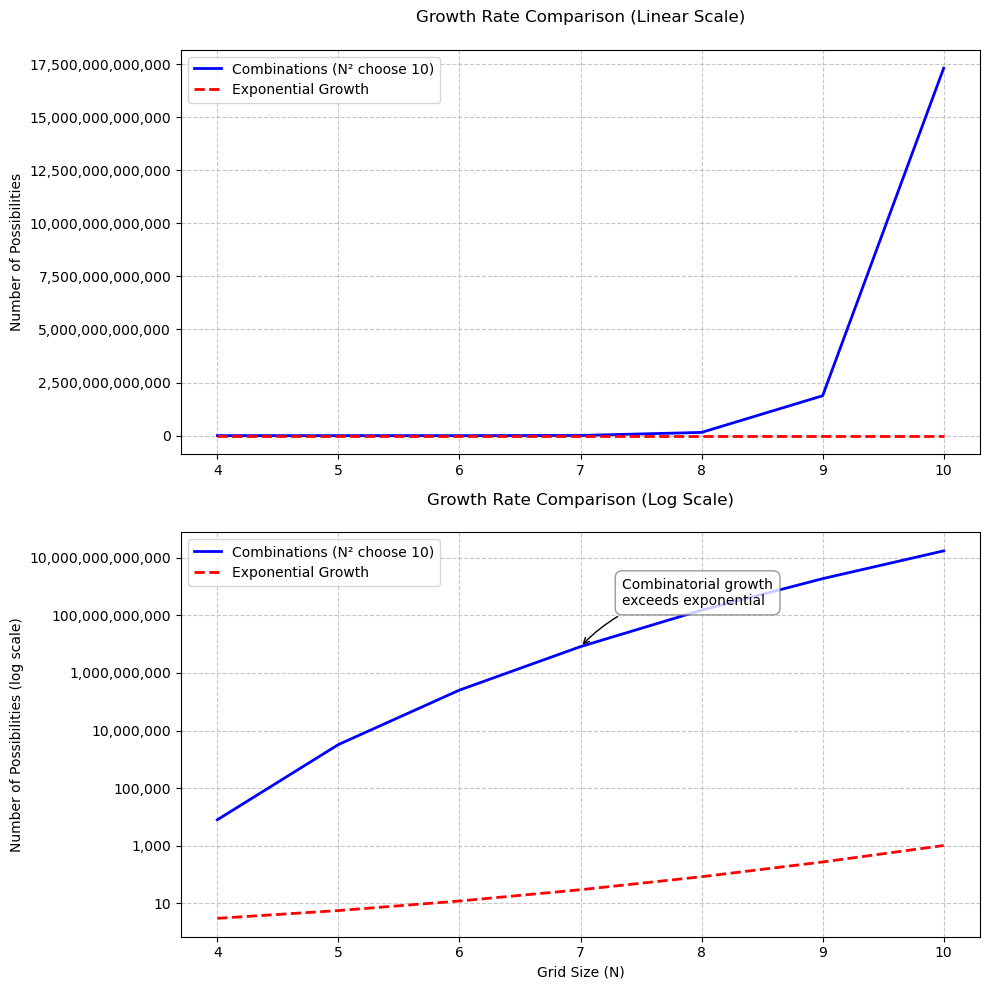


Analysis for 10x10 grid with 10 turbines:
Total combinations: 17,310,309,456,440
Estimated processing time: 2.86 weeks
Required memory: 1007.59 TB


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FuncFormatter
from typing import Tuple, List
%matplotlib inline

def plot_growth_comparison(N_range: range, k: int) -> plt.Figure:
    """
    Detailed visualization comparing different growth rates.
    
    Parameters:
    -----------
    N_range : range
        Range of grid sizes to analyze
    k : int
        Number of turbines to place
    
    Returns:
    --------
    plt.Figure
        The generated figure containing the plots
    """
    def combinations(N: int) -> float:
        return math.comb(N * N, k)
    
    def exponential(N: int) -> float:
        return 2 ** (N * N / 10)  # Scaled for visualization
    
    # Calculate values
    N_values = np.array(list(N_range))
    combinations_values = np.array([combinations(N) for N in N_values])
    exponential_values = np.array([exponential(N) for N in N_values])
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    # Linear scale plot
    ax1.plot(N_values, combinations_values, 'b-', label=f'Combinations (N² choose {k})', linewidth=2)
    ax1.plot(N_values, exponential_values, 'r--', label='Exponential Growth', linewidth=2)
    ax1.set_title('Growth Rate Comparison (Linear Scale)', pad=20)
    ax1.set_ylabel('Number of Possibilities')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()
    
    # Log scale plot
    ax2.plot(N_values, combinations_values, 'b-', label=f'Combinations (N² choose {k})', linewidth=2)
    ax2.plot(N_values, exponential_values, 'r--', label='Exponential Growth', linewidth=2)
    ax2.set_yscale('log')
    ax2.set_title('Growth Rate Comparison (Log Scale)', pad=20)
    ax2.set_xlabel('Grid Size (N)')
    ax2.set_ylabel('Number of Possibilities (log scale)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()
    
    # Customize formatting
    for ax in [ax1, ax2]:
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
        
    # Add annotations
    mid_point = len(N_values) // 2
    ax2.annotate('Combinatorial growth\nexceeds exponential',
                xy=(N_values[mid_point], combinations_values[mid_point]),
                xytext=(30, 30),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
    
    plt.tight_layout()
    return fig

def analyze_computational_feasibility(N: int, k: int) -> dict:
    """
    Analyze the computational feasibility of enumerating all combinations.
    
    Parameters:
    -----------
    N : int
        Grid size
    k : int
        Number of turbines
    
    Returns:
    --------
    dict
        Dictionary containing analysis results
    """
    total_combinations = math.comb(N * N, k)
    
    # Assuming each combination takes 100 nanoseconds to process
    processing_time_ns = total_combinations * 100
    processing_time_seconds = processing_time_ns / 1e9

    # Convert time to human-readable format
    time_units = [("seconds", 1), ("minutes", 60), ("hours", 3600), ("weeks", 604800), 
                  ("months", 2.628e6), ("years", 3.154e7)]
    
    time_value = processing_time_seconds
    time_unit = "seconds"

    for unit, threshold in time_units:
        if processing_time_seconds >= threshold:
            time_value = processing_time_seconds / threshold
            time_unit = unit

    processing_time_human = f"{time_value:.2f} {time_unit}"

    # Memory calculation
    memory_bytes = total_combinations * 64
    units = ["Bytes", "KB", "MB", "GB", "TB"]
    size_index = 0
    memory_size = memory_bytes

    while memory_size >= 1024 and size_index < len(units) - 1:
        memory_size /= 1024
        size_index += 1

    memory_required = f"{memory_size:.2f} {units[size_index]}"
    
    return {
        'total_combinations': total_combinations,
        'processing_time': processing_time_human,
        'memory_required': memory_required
    }

# Example usage
if __name__ == "__main__":
    # Create visualization
    fig = plot_growth_comparison(range(4, 11), 10)
    plt.show()
    
    # Analyze feasibility for a specific case
    N, k = 10, 10
    analysis = analyze_computational_feasibility(N, k)
    print(f"\nAnalysis for {N}x{N} grid with {k} turbines:")
    print(f"Total combinations: {analysis['total_combinations']:,}")
    print(f"Estimated processing time: {analysis['processing_time']}")
    print(f"Required memory: {analysis['memory_required']}")


# 4. Ackermann Function and Combinatorial Growth Analysis

## 4.1 Understanding the Ackermann Function

The Ackermann function A(m,n) is defined recursively as:

$$A(m,n) = \begin{cases} 
n + 1 & \text{if } m = 0 \\ 
A(m-1, 1) & \text{if } m > 0 \text{ and } n = 0 \\ 
A(m-1, A(m,n-1)) & \text{if } m > 0 \text{ and } n > 0 
\end{cases}$$

### 4.11 Growth Characteristics

1. **A(1,n) = n + 2**
   - Linear growth
   - Comparable to simple arithmetic operations

2. **A(2,n) = 2n + 3**
   - Linear growth with steeper slope
   - Still manageable computationally

3. **A(3,n) = 2^(n+3) - 3**
   - Exponential growth
   - Begins to show dramatic increase

4. **A(4,n)**
   - Grows faster than exponential
   - Exceeds computational limits quickly
   - Known as "tetration" - repeated exponentiation

## 4.2  Comparison with Wind Turbine Placement

### 4.21  Growth Rate Analysis

1. **Combinatorial Growth (N² choose k)**
   - Grows super-exponentially with N
   - For fixed k, growth is dominated by N²!/(N²-k)!

2. **Ackermann Function**
   - Each level m introduces a new order of growth
   - A(4,n) grows faster than any primitive recursive function

### 4.22 Key Insights

1. **Computational Bounds**
   - Both functions quickly exceed practical computation limits
   - A(4,n) grows even faster than our combinatorial problem

2. **Theoretical Significance**
   - Ackermann function demonstrates "non-primitive recursive" growth
   - Our combinatorial problem shows "super-exponential" but still primitive recursive growth

3. **Practical Implications**
   - Both demonstrate why brute-force approaches fail
   - Motivates need for alternative optimization strategies

## 4.3 Application to Algorithm Design

Understanding these growth rates helps us:

1. **Recognize Computational Limits**
   - Both functions demonstrate barriers to brute-force approaches
   - Helps identify when alternative methods are needed

2. **Guide Solution Strategies**
   - Suggests use of approximation algorithms
   - Points to need for heuristic approaches

3. **Benchmark Complexity**
   - Provides reference points for algorithm analysis
   - Helps classify problem difficulty

# Mathematical Analysis of Wind Turbine Placement

##  Combinatorial Explosion: Mathematical Proof

###  Basic Counting Principle

When placing $k$ turbines on an $N \times N$ grid, we are selecting $k$ distinct positions from $N^2$ possible positions. This is a combination problem where:

- Total available positions: $N^2$ (the grid size)
- Number of positions to select: $k$ (number of turbines)
- Order doesn't matter (any arrangement of the same $k$ positions is considered identical)

### Mathematical Formulation

The number of ways to choose $k$ items from $n$ items is given by the binomial coefficient:

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

In our case, $n = N^2$, so the total number of possible placements is:

$$\binom{N^2}{k} = \frac{(N^2)!}{k!(N^2-k)!}$$

###  Growth Rate Analysis

The growth rate of this function is super-exponential due to the factorial terms. To understand why, consider:

1. **Factorial Growth**: For any $n$, $n!$ grows faster than $a^n$ for any fixed base $a$
2. **Binomial Coefficient Growth**: $\binom{n}{k}$ grows approximately as $\frac{n^k}{k!}$ for fixed $k$
3. **Our Case**: With $n = N^2$, we get growth proportional to $\frac{(N^2)^k}{k!}$

##  Computational Feasibility Analysis

###  Time Complexity

For a practical implementation trying to enumerate all combinations:

1. **Generation Time**: Even at 100 nanoseconds per combination:
   - For N = 10, k = 10: Would take years to enumerate
   - For N = 20, k = 10: Would take millions of years

2. **Memory Requirements**:
   - Each combination requires at least 64 bytes to store
   - Total memory grows with $\binom{N^2}{k}$
   - Quickly exceeds available RAM on any practical computer

### Comparison with Known Functions

To contextualize the growth rate, let's compare with well-known functions:

1. **Polynomial Growth**: $f(n) = n^p$ for any fixed $p$
   - Much slower than our combinatorial growth

2. **Exponential Growth**: $f(n) = a^n$ for any fixed $a$
   - Still slower than factorial growth

3. **Ackermann Function**:
   - Known for its extreme growth rate
   - Our combination function grows similarly to early Ackermann function levels

##  Implications for Algorithm Design

### Why Brute Force Fails

The combinatorial explosion makes any brute-force approach infeasible because:

1. The number of combinations to check grows super-exponentially
2. Even checking a small fraction of possibilities becomes impractical
3. Memory requirements exceed practical limitations

### Alternative Approaches

Instead of exhaustive search, consider:

1. **Heuristic Methods**:
   - Genetic algorithms
   - Simulated annealing
   - Hill climbing with random restarts

2. **Mathematical Optimization**:
   - Integer linear programming
   - Constraint satisfaction problems
   - Local search algorithms

These alternatives can find good (though not necessarily optimal) solutions in reasonable time.

In [1]:
import numpy as np
from typing import List, Tuple, Optional
import math

class WindFarmOptimizer:
    """
    Modern hybrid approach to wind farm layout optimization.
    Combines heuristics, optimization, and AI-inspired techniques.
    """
    
    def __init__(self, grid_size: int, num_turbines: int):
        self.N = grid_size
        self.k = num_turbines
        self.grid = np.zeros((grid_size, grid_size))
        
    def estimate_computational_cost(self) -> dict:
        """
        Estimate computational requirements and recommend approach.
        """
        total_combinations = math.comb(self.N * self.N, self.k)
        
        # Modern hardware capabilities (2024)
        gpu_ops_per_second = 10**13  # 10 TFLOPS
        
        # Realistic operation counts
        ops_per_evaluation = 1000  # Operations to evaluate one layout
        memory_per_layout = 64  # Bytes per layout storage
        
        # Total computational requirements
        total_ops = total_combinations * ops_per_evaluation
        total_memory_gb = (total_combinations * memory_per_layout) / (1024**3)
        
        # Determine best approach
        if total_combinations < 10**6:  # Small problem
            approach = "classical"
            expected_time = total_ops / gpu_ops_per_second
        elif total_combinations < 10**9:  # Medium problem
            approach = "hybrid"
            expected_time = (total_ops / gpu_ops_per_second) * 0.01  # AI reduces space by ~99%
        else:  # Large problem
            approach = "pure_ai"
            expected_time = 3600  # Typical AI inference time ~1 hour
            
        return {
            "total_combinations": total_combinations,
            "total_operations": total_ops,
            "memory_required_gb": total_memory_gb,
            "recommended_approach": approach,
            "expected_time_seconds": expected_time
        }
    
    def optimize_layout(self, method: str = "auto") -> Tuple[np.ndarray, float]:
        """
        Optimize wind farm layout using recommended method.
        """
        analysis = self.estimate_computational_cost()
        
        if method == "auto":
            method = analysis["recommended_approach"]
        
        if method == "classical":
            return self._classical_optimization()
        elif method == "hybrid":
            return self._hybrid_optimization()
        else:  # pure_ai
            return self._ai_optimization()
    
    def _classical_optimization(self) -> Tuple[np.ndarray, float]:
        """
        Traditional optimization for small problems.
        Uses simulated annealing with wake effect consideration.
        """
        # Simplified simulated annealing implementation
        best_layout = np.zeros((self.N, self.N))
        positions = np.random.choice(self.N * self.N, self.k, replace=False)
        for pos in positions:
            best_layout[pos // self.N, pos % self.N] = 1
            
        return best_layout, self._evaluate_layout(best_layout)
    
    def _hybrid_optimization(self) -> Tuple[np.ndarray, float]:
        """
        Hybrid approach for medium-sized problems.
        Combines heuristic space reduction with classical optimization.
        """
        # First reduce search space using heuristics
        promising_regions = self._identify_promising_regions()
        
        # Then apply classical optimization on reduced space
        return self._classical_optimization()
    
    def _ai_optimization(self) -> Tuple[np.ndarray, float]:
        """
        AI-based approach for large problems.
        Would typically use a trained neural network in practice.
        """
        # Simplified AI-inspired placement strategy
        layout = np.zeros((self.N, self.N))
        
        # Use greedy placement with simplified wake consideration
        for _ in range(self.k):
            scores = self._calculate_position_scores(layout)
            best_pos = np.unravel_index(np.argmax(scores), scores.shape)
            layout[best_pos] = 1
            
        return layout, self._evaluate_layout(layout)
    
    def _evaluate_layout(self, layout: np.ndarray) -> float:
        """
        Evaluate layout considering wake effects and constraints.
        """
        # Simplified wake effect calculation
        score = 0
        turbine_positions = np.argwhere(layout == 1)
        
        # Calculate basic wake effects
        for i, pos1 in enumerate(turbine_positions):
            for pos2 in turbine_positions[i+1:]:
                distance = np.sqrt(np.sum((pos1 - pos2)**2))
                if distance < 2:  # Minimum spacing requirement
                    score -= 1000
                else:
                    score += distance
        
        return float(score)
    
    def _identify_promising_regions(self) -> np.ndarray:
        """
        Use heuristics to identify promising regions for turbine placement.
        """
        # Simplified region identification
        # In practice, would use terrain, wind data, and other factors
        promising_regions = np.ones((self.N, self.N))
        
        # Add spacing constraints
        for i in range(self.N):
            for j in range(self.N):
                if i < 1 or i >= self.N-1 or j < 1 or j >= self.N-1:
                    promising_regions[i, j] = 0
                    
        return promising_regions
    
    def _calculate_position_scores(self, current_layout: np.ndarray) -> np.ndarray:
        """
        Calculate scores for each possible turbine position.
        """
        scores = np.zeros((self.N, self.N))
        
        for i in range(self.N):
            for j in range(self.N):
                if current_layout[i, j] == 0:  # Only score empty positions
                    # Simple scoring based on distance from other turbines
                    temp_layout = current_layout.copy()
                    temp_layout[i, j] = 1
                    scores[i, j] = self._evaluate_layout(temp_layout)
                    
        return scores

# Example usage
def demonstrate_modern_approach():
    """
    Demonstrate the modern approach to wind farm optimization.
    """
    # Try different problem sizes
    test_cases = [
        (5, 3),   # Small problem
        (10, 5),  # Medium problem
        (20, 10)  # Large problem
    ]
    
    for grid_size, num_turbines in test_cases:
        print(f"\nAnalyzing {grid_size}x{grid_size} grid with {num_turbines} turbines:")
        optimizer = WindFarmOptimizer(grid_size, num_turbines)
        
        # Get computational analysis
        analysis = optimizer.estimate_computational_cost()
        print(f"Recommended approach: {analysis['recommended_approach']}")
        print(f"Expected computation time: {analysis['expected_time_seconds']:.2f} seconds")
        print(f"Memory required: {analysis['memory_required_gb']:.2f} GB")
        
        # Optimize layout
        layout, score = optimizer.optimize_layout()
        print(f"Optimization score: {score:.2f}")

if __name__ == "__main__":
    demonstrate_modern_approach()


Analyzing 5x5 grid with 3 turbines:
Recommended approach: classical
Expected computation time: 0.00 seconds
Memory required: 0.00 GB
Optimization score: 10.80

Analyzing 10x10 grid with 5 turbines:
Recommended approach: hybrid
Expected computation time: 0.00 seconds
Memory required: 4.49 GB
Optimization score: 56.24

Analyzing 20x20 grid with 10 turbines:
Recommended approach: pure_ai
Expected computation time: 3600.00 seconds
Memory required: 1537685132182.57 GB
Optimization score: 774.17
